# K-Means

 Make data set

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)



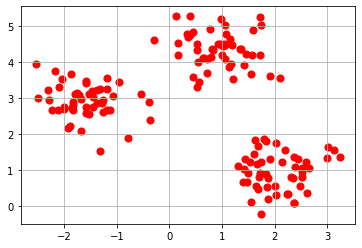

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='r', marker='o',s=50)
plt.grid()
plt.show()

Create K-MEans

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='random',
           n_init = 10, # clusterization
           max_iter=300, # max iter per clusterization
           tol=1e-04,
           random_state = 0)

y_km = km.fit_predict(X)

C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


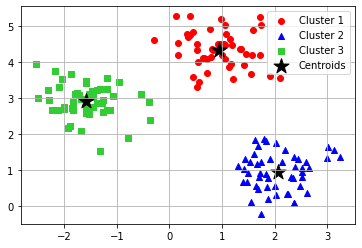

In [16]:
plt.scatter(X[y_km == 0, 0],
           X[y_km ==0, 1], c='red', label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
           X[y_km ==1, 1], c='blue', marker='^',label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
           X[y_km ==2, 1], c='limegreen',marker='s', label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],
          km.cluster_centers_[:,1], c='black',s=250,marker='*', label='Centroids')
plt.grid()
plt.legend()
plt.show()

# K-Means ++

In [13]:
from sklearn.cluster import KMeans
km_p = KMeans(n_clusters=3,
           init='k-means++',
           n_init = 10, # clusterization
           max_iter=300, # max iter per clusterization
           tol=1e-04,
           random_state = 0)
y_km_p = km_p.fit_predict(X)

C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


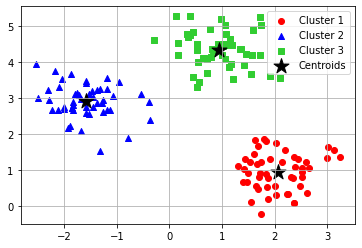

In [17]:
plt.scatter(X[y_km_p== 0, 0],
           X[y_km_p ==0, 1], c='red', label='Cluster 1')
plt.scatter(X[y_km_p == 1, 0],
           X[y_km_p ==1, 1], c='blue', marker='^',label='Cluster 2')
plt.scatter(X[y_km_p == 2, 0],
           X[y_km_p ==2, 1], c='limegreen',marker='s', label='Cluster 3')

plt.scatter(km_p.cluster_centers_[:,0],
          km_p.cluster_centers_[:,1], c='black',s=250,marker='*', label='Centroids')
plt.grid()
plt.legend()
plt.show()

# Elbow method

In [20]:
print(f'Distortion {km_p.inertia_:.2f}')

Distortion 72.48


C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: 

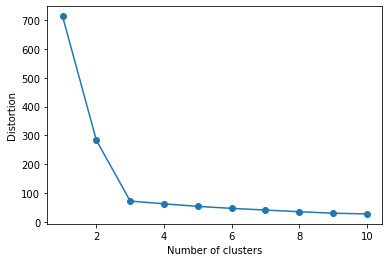

In [21]:
distortions = []

for i in range(1,11):
    kmp = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    kmp.fit(X)
    distortions.append(kmp.inertia_)
plt.plot(range(1,11),distortions, marker='o')    
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Silhouette Method

This is an example of good clusterization, since S>0!

C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


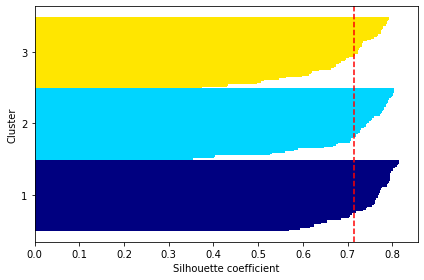

In [22]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples



km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

bad clusterization

C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


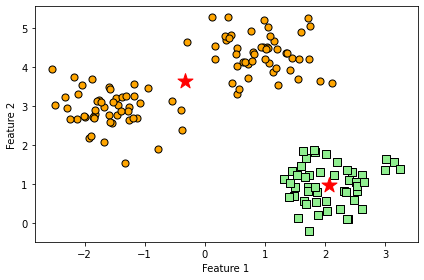

In [23]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

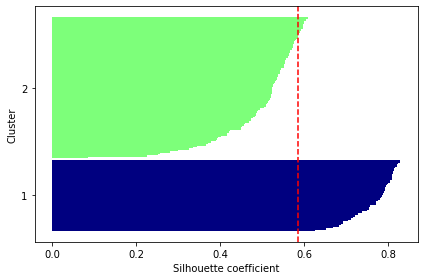

In [24]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

# Hierarchical tree clustring
## Agglomerative approach w.r.t complete linkage

Generate data set

In [26]:
import pandas as pd
import numpy as np

np.random.seed(123)

vbls = ['X','Y', 'Z']
labs = ['ID_0','ID_1','ID_2','ID_3','ID_4']

X = np.random.random_sample([5,3])*10

df = pd.DataFrame(X, columns=vbls, index=labs)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


Compute similarity matrix

In [27]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform( # square matrix
                            pdist( # compute distance
                                df, metric='euclidean')),
                       columns=labs, index=labs)

row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Get linkage matrix from scipy. Upper-triangle matrix

In [28]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

convert to dataframe

In [29]:
pd.DataFrame(row_clusters,
            columns=['row_lb1','row_lb2','distance', 'number of members in cluster'],
            index=['cluster %d'%(i+1) for i in range(row_clusters.shape[0])])

,row_lb1,row_lb2,distance,number of members in cluster
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


Display the dendrogram

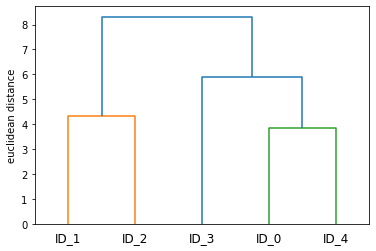

In [32]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                      labels=labs)

plt.ylabel("euclidean distance")
plt.show()

most similar pairs are ID1 and ID2;  ID0 and ID4, which merged with ID3 and finally with ID1, ID2.

Display heatmap

C:\Users\Anaconda\AppData\Local\Temp\ipykernel_7612\120835006.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\Anaconda\AppData\Local\Temp\ipykernel_7612\120835006.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


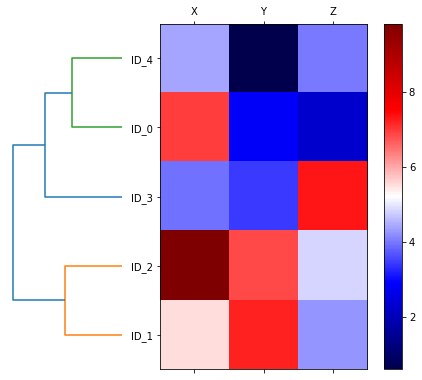

In [46]:
fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

row_dendr = dendrogram(row_clusters,
                      orientation='left')

# use leaves and sort int descending order 
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]


# heatmap
axm = fig.add_axes([0.235, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                 interpolation='nearest',
                 cmap='seismic')

fig.colorbar(cax)

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)
    
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## SKLEARN IMPLEMENTATION


In [47]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters =3,#cut the tree
                            affinity='euclidean',
                             linkage='complete'
                            )

labels = ac.fit_predict(X)
print(f'Labels: {labels}')

Labels: [1 0 0 2 1]


ID0 and ID4-1, ID1 and ID2-0, ID3-2

In [48]:
ac = AgglomerativeClustering(n_clusters =2,#cut the tree
                            affinity='euclidean',
                             linkage='complete'
                            )

labels = ac.fit_predict(X)
print(f'Labels: {labels}')

Labels: [0 1 1 0 0]


# DBSCAN


Create data set

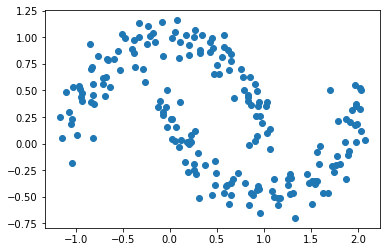

In [49]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.1, random_state=0)
plt.scatter(X[:,0], X[:,1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

We compare results of KMeans, agglomerative clustering and DBSCAN

In [53]:
# K-means
km = KMeans(n_clusters=2,
           random_state=0,
            init='k-means++', tol=1e-4)
y_km = km.fit_predict(X)



C:\Users\Anaconda\Miniconda3\envs\MLenv\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [54]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(
                               n_clusters=2,
                            affinity='euclidean',
                            linkage='complete'


)

y_ac = ac.fit_predict(X)

In [55]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
           min_samples=5,
           metric='euclidean')
y_db = db.fit_predict(X)

Text(0, 0.5, 'Feature 2')

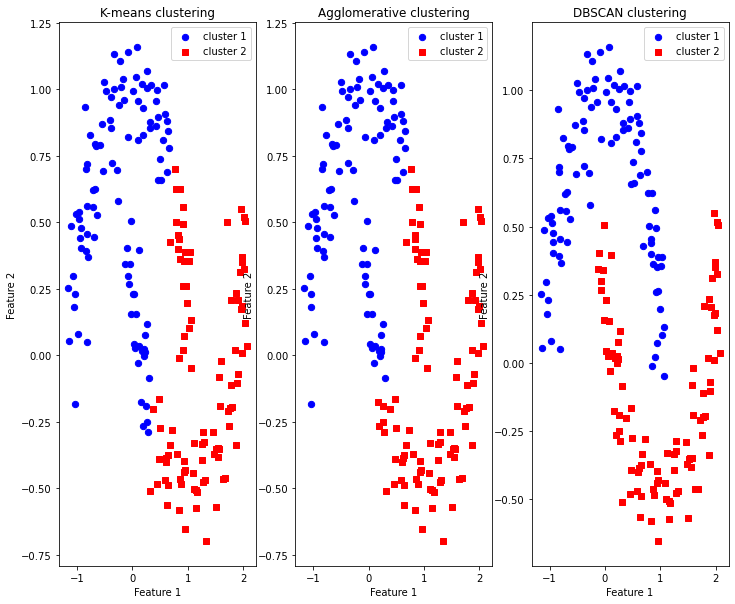

In [62]:
f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(12,10))

# K-Means++
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
                     c='blue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ax1.legend()
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Agglomerative
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1],
                    c='blue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1],
           c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.legend()
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# DBSCAN
ax3.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
                    c='blue', marker='o', s=40, label='cluster 1')
ax3.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
           c='red', marker='s', s=40, label='cluster 2')
ax3.set_title('DBSCAN clustering')
ax3.legend()
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')